In [1]:

import pandas as pd
import csv
import numpy as np
# import mplcursors
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
def find_repo_root(start_path):
    """
    useful general function for finding the (first, closest) repo root so github file paths work the same on different machines 
    """
    current_path = os.path.abspath(start_path)
    
    while True:
        # Check for the existence of the .git directory or other indicators
        if os.path.isdir(os.path.join(current_path, '.git')) or \
           os.path.isfile(os.path.join(current_path, 'README.md')):
            return current_path
        
        parent_path = os.path.dirname(current_path)
        
        # Stop if we reach the root directory
        if parent_path == current_path:
            break
        
        current_path = parent_path

    return None  # Return None if not found

root = find_repo_root(os.getcwd())

In [3]:
### Make matrix with all movie
all_tropes = []
matrix_maker = []
genres = []
with open(f"{root}/Data/liteweight/2020_genre_counts_by_trope.csv", "r") as file:
    reader = csv.reader(file)
    row1 = next(reader)
    for i in range(2,29):
            genres.append(row1[i])
    for line in reader:
        #line_list = line.split(",")
        all_tropes.append(line[1])
        genre_counts = []
        for i in range(2,29):
            genre_counts.append(int(line[i]))
        normalization = sum(genre_counts)
        try:
            genre_percents = [genre_count / normalization for genre_count in genre_counts]
            matrix_maker.append(genre_percents)
        except ZeroDivisionError:
            matrix_maker.append(genre_counts)
    
bad_matrix = np.array(matrix_maker)
matrix = bad_matrix.transpose()
print(len(all_tropes))

26246


In [4]:
matrix

array([[0.14814815, 0.15625   , 0.09375   , ..., 0.33333333, 0.32      ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03703704, 0.0625    , 0.09375   , ..., 0.        , 0.28      ,
        0.        ],
       ...,
       [0.        , 0.03125   , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03703704, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [5]:
df_matrix = pd.DataFrame(matrix)
df_matrix.columns = all_tropes
df_matrix.index = genres
df_matrix.reset_index(names="genre")


genre  ABNegative  ABirthdayNotABreak  ABloodyMess  \
0        Action    0.148148             0.15625      0.09375   
1         Adult    0.000000             0.00000      0.00000   
2     Adventure    0.037037             0.06250      0.09375   
3     Animation    0.000000             0.00000      0.00000   
4     Biography    0.000000             0.03125      0.00000   
5        Comedy    0.111111             0.06250      0.25000   
6         Crime    0.111111             0.12500      0.03125   
7   Documentary    0.000000             0.03125      0.00000   
8         Drama    0.296296             0.15625      0.18750   
9        Family    0.037037             0.00000      0.03125   
10      Fantasy    0.037037             0.00000      0.00000   
11    Film-Noir    0.000000             0.00000      0.03125   
12    Game-Show    0.000000             0.00000      0.00000   
13      History    0.000000             0.03125      0.00000   
14       Horror    0.000000             0.09375      0.00000   
15        Music    0.000000             0.00000      0.00000   
16      Musical    0.000000             0.00000      0.00000   
17      Mystery    0.037037             0.09375      0.06250   
18         News    0.000000             0.00000      0.00000   
19      Romance    0.074074             0.00000      0.12500   
20       Sci-Fi    0.000000             0.03125      0.03125   
21        Short    0.000000             0.00000      0.00000   
22        Sport    0.000000             0.00000      0.00000   
23     Thriller    0.074074             0.09375      0.06250   
24          War    0.000000             0.03125      0.00000   
25      Western    0.000000             0.00000      0.00000   
26           \N    0.037037             0.00000      0.00000   

    ABoyAGirlAndABabyFamily  ABoyAndHisX  ACappella  ACatInAGangOfDogs  \
0                     0.000     0.055556   0.000000                0.0   
1                     0.000     0.000000   0.000000                0.0   
2                     0.125     0.166667   0.000000                0.2   
3                     0.000     0.000000   0.000000                0.0   
4                     0.000     0.000000   0.000000                0.0   
5                     0.375     0.083333   0.333333                0.4   
6                     0.000     0.027778   0.000000                0.0   
7                     0.000     0.000000   0.083333                0.0   
8                     0.125     0.277778   0.000000                0.2   
9                     0.125     0.222222   0.000000                0.2   
10                    0.125     0.000000   0.083333                0.0   
11                    0.000     0.000000   0.000000                0.0   
12                    0.000     0.000000   0.000000                0.0   
13                    0.000     0.000000   0.000000                0.0   
14                    0.000     0.055556   0.000000                0.0   
15                    0.000     0.000000   0.166667                0.0   
16                    0.000     0.000000   0.083333                0.0   
17                    0.125     0.027778   0.000000                0.0   
18                    0.000     0.000000   0.000000                0.0   
19                    0.000     0.000000   0.250000                0.0   
20                    0.000     0.027778   0.000000                0.0   
21                    0.000     0.027778   0.000000                0.0   
22                    0.000     0.000000   0.000000                0.0   
23                    0.000     0.027778   0.000000                0.0   
24                    0.000     0.000000   0.000000                0.0   
25                    0.000     0.000000   0.000000                0.0   
26                    0.000     0.000000   0.000000                0.0   

    AChatWithSatan  AChildShallLeadThem  ...  ZombieAdvocate  \
0         0.142857             0.130435  ...        0.000000   
1         0.0000

In [6]:
df_matrix_t = df_matrix.transpose()
df_matrix_t.reset_index(names='Trope', inplace=True)

In [7]:
df_matrix_t.sort_values(by='Action')

Trope  Action  Adult  Adventure  Animation  \
23242              TheWickedStage     0.0    0.0   0.000000        0.0   
8168              FollowYourHeart     0.0    0.0   0.000000        0.0   
14773              MyspeldRokband     0.0    0.0   0.000000        0.0   
18                  ADayInTheLife     0.0    0.0   0.000000        0.0   
17                 ADayInHerApron     0.0    0.0   0.071429        0.0   
...                           ...     ...    ...        ...        ...   
13803          MechaExpansionPack     1.0    0.0   0.000000        0.0   
604    AllChinesePeopleKnowKungFu     1.0    0.0   0.000000        0.0   
21443     SuperNaturalMartialArts     1.0    0.0   0.000000        0.0   
5114                    DePowered     1.0    0.0   0.000000        0.0   
3508                 CelibacyHero     1.0    0.0   0.000000        0.0   

       Biography    Comedy  Crime  Documentary     Drama  ...  Mystery  News  \
23242   0.166667  0.166667    0.0     0.000000  0.333333  ...      0.0   0.0   
8168    0.000000  0.214286    0.0     0.000000  0.071429  ...      0.0   0.0   
14773   0.000000  0.363636    0.0     0.000000  0.272727  ...      0.0   0.0   
18      0.000000  0.142857    0.0     0.285714  0.142857  ...      0.0   0.0   
17      0.000000  0.214286    0.0     0.000000  0.285714  ...      0.0   0.0   
...          ...       ...    ...          ...       ...  ...      ...   ...   
13803   0.000000  0.000000    0.0     0.000000  0.000000  ...      0.0   0.0   
604     0.000000  0.000000    0.0     0.000000  0.000000  ...      0.0   0.0   
21443   0.000000  0.000000    0.0     0.000000  0.000000  ...      0.0   0.0   
5114    0.000000  0.000000    0.0     0.000000  0.000000  ...      0.0   0.0   
3508    0.000000  0.000000    0.0     0.000000  0.000000  ...      0.0   0.0   

        Romance  Sci-Fi     Short  Sport  Thriller  War  Western   \N  
23242  0.000000     0.0  0.000000    0.0       0.0  0.0      0.0  0.0  
8168   0.142857     0.0  0.071429    0.0       0.0  0.0      0.0  0.0  
14773  0.000000     0.0  0.000000    0.0       0.0  0.0      0.0  0.0  
18     0.000000     0.0  0.142857    0.0       0.0  0.0      0.0  0.0  
17     0.000000     0.0  0.071429    0.0       0.0  0.0      0.0  0.0  
...         ...     ...       ...    ...       ...  ...      ...  ...  
13803  0.000000     0.0  0.000000    0.0       0.0  0.0      0.0  0.0  
604    0.000000     0.0  0.000000    0.0       0.0  0.0      0.0  0.0  
21443  0.000000     0.0  0.000000    0.0       0.0  0.0      0.0  0.0  
5114   0.000000     0.0  0.000000    0.0       0.0  0.0      0.0  0.0  
3508   0.000000     0.0  0.000000    0.0       0.0  0.0      0.0  0.0  

[26246 rows x 28 columns]

In [8]:
movie_tropes = pd.read_csv(f"{root}/Code/Alien Stuff/Alien Tropes - CodeTest.tsv", delimiter='\t')
movie_tropes['Trope'] = movie_tropes['Trope'].apply(lambda x: x.replace(" ", ""))
movie_tropes = movie_tropes.merge(right=df_matrix_t, on='Trope', how='left',)
movie_tropes['Duration'] = movie_tropes['End Time'] - movie_tropes['Start Time']
movie_tropes['Duration'].value_counts()
movie_tropes.head()

Trope Inverted?/Defied? Averted/Subverted?  \
0          ActionSurvivor                No                 No   
1  AdmiringTheAbomination                No                 No   
2          AIIsACrapshoot                No                 No   
3      Air-VentPassageway                No                 No   
4              AlienBlood                No                 No   

               Rough Occurence in movie Background? Setups?  Start Time  \
0        Part of the genre of the movie         Yes      No           0   
1                  The perfect organism          No      No        5162   
2     Ripley discovers Ash's intentions          No      No        5130   
3                     Xenomorph on ship          No      No        4107   
4  Trying to remove fachugger from Kane          No      No        2373   

   End Time  Total Time    Action  ...  News   Romance    Sci-Fi     Short  \
0      7014        7014  0.203661  ...   0.0  0.009153  0.073227  0.002288   
1      5162        7014  0.152941  ...   0.0  0.000000  0.223529  0.000000   
2      5130        7014  0.202643  ...   0.0  0.004405  0.264317  0.008811   
3      4108        7014       NaN  ...   NaN       NaN       NaN       NaN   
4      2462        7014  0.197674  ...   0.0  0.000000  0.232558  0.005814   

   Sport  Thriller       War   Western   \N  Duration  
0    0.0  0.118993  0.006865  0.004577  0.0      7014  
1    0.0  0.105882  0.000000  0.011765  0.0         0  
2    0.0  0.074890  0.000000  0.000000  0.0         0  
3    NaN       NaN       NaN       NaN  NaN         1  
4    0.0  0.052326  0.000000  0.000000  0.0        89  

[5 rows x 37 columns]

In [9]:
# Filter the dataframe
active_tropes = movie_tropes[(movie_tropes['Background?'] == 'No') & (movie_tropes['Duration'] < 500)].copy()
# print(active_tropes['Duration'].value_counts()
# Create 'seconds' column with list of seconds between 'Start Time' and 'End Time'
active_tropes['seconds'] = active_tropes.apply(lambda row: set(range(row['Start Time'], row['End Time'] + 1)), axis=1)

# Get the set of all unique seconds by combining all the 'seconds' sets
all_seconds = set().union(*active_tropes['seconds'])
active_tropes.sort_values(by='Horror', inplace=True, ascending=False)
active_tropes[['Trope', 'Horror', 'Start Time']]

Trope    Horror  Start Time
195            ScrewThisImOutofHere  0.500000        5220
169                 NotInMyContract  0.500000         725
100                       FinalGirl  0.377916        5649
96          FaceFullOfAlienWingWong  0.375000        2314
229          TrappedWithMonsterPlot  0.297297        3410
..                              ...       ...         ...
194  ScrewtheRulesImDoingWhatsRight       NaN        2174
201             SinisterSuffocation       NaN        4951
226           ThrownOutOfTheAirlock       NaN        3480
227           ThrownOutOfTheAirlock       NaN        6711
240               WhiteShirtofDeath       NaN        3366

[201 rows x 3 columns]

In [10]:
# Filter the dataframe
tau = 5
active_tropes = movie_tropes[(movie_tropes['Background?'] == 'No') & (movie_tropes['Duration'] < 500)].copy()
# print(active_tropes['Duration'].value_counts()
# Create 'seconds' column with list of seconds between 'Start Time' and 'End Time'
active_tropes['seconds'] = active_tropes.apply(lambda row: set(range(row['Start Time'], row['End Time'] + 1)), axis=1)

# Get the set of all unique seconds by combining all the 'seconds' sets
all_seconds = set().union(*active_tropes['seconds'])
active_tropes['active_seconds'] = active_tropes.apply(lambda row: set(range(row['Start Time'], row['End Time'] + tau)), axis=1)
active_tropes['active_seconds'].head()
filtered_df = active_tropes[active_tropes['active_seconds'].apply(lambda x: 5162 in x)]
filtered_df

Trope Inverted?/Defied? Averted/Subverted?  \
1    AdmiringTheAbomination                No                 No   
231        UltimateLifeForm                No                 No   

                             Rough Occurence in movie Background? Setups?  \
1                                The perfect organism          No      No   
231  What Ash says about the Alien "perfect organism"          No      No   

     Start Time  End Time  Total Time    Action  ...    Sci-Fi  Short  Sport  \
1          5162      5162        7014  0.152941  ...  0.223529    0.0    0.0   
231        5162      5162        7014  0.058824  ...  0.176471    0.0    0.0   

     Thriller  War   Western   \N  Duration  seconds  \
1    0.105882  0.0  0.011765  0.0         0   {5162}   
231  0.235294  0.0  0.000000  0.0         0   {5162}   

                     active_seconds  
1    {5162, 5163, 5164, 5165, 5166}  
231  {5162, 5163, 5164, 5165, 5166}  

[2 rows x 39 columns]

In [11]:
movie_tropes.columns

Index(['Trope', 'Inverted?/Defied?', 'Averted/Subverted?',
       'Rough Occurence in movie', 'Background?', 'Setups?', 'Start Time',
       'End Time', 'Total Time', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', '\N', 'Duration'],
      dtype='object')

In [12]:
tau = 500


def build_snapshots(df, genres, tau):
    max_second = df['End Time'].max()
    df['active_seconds'] = df.apply(lambda row: set(range(row['Start Time'], min(max_second, row['End Time'] + tau))), axis=1)
    df['func_start'] = df.apply(lambda row: set(range(row['Start Time'], min(max_second, row['Start Time'] + tau))), axis=1)

                                
    df.loc[
    (df['Inverted?/Defied?'] == 'Yes') | (df['Averted/Subverted?'] == 'Yes'), genres] *= -1
    df = df[df['Setups?'] !='Yes']
    # print(df[['Start Time', 'End Time', 'active_seconds']].head())  
    # affected_rows = df[(df['Inverted?/Defied?'] == 'Yes') | (df['Averted/Subverted?'] == 'Yes')]


    #  inverted_or_defied = line[1]
    #     averted_or_subverted = line[2]
    #     descriptor = line[3]
    #     background = line[4]
    #     setup = line[5]

    snapshots = []
    for second in range(0, max_second):
        # print(second)
        # Filter active tropes for the current second
        filtered_df = df[df['func_start'].apply(lambda x: second in x)]
        
        if len(filtered_df) > 0:
            # Get the list of tropes active at this second
            tropes = filtered_df['Trope'].tolist()
            
            # norm and cut at 0 so we dont get negative expectation
            total_genre_expectation = filtered_df[genres].sum()
            total_genre_expectation /= total_genre_expectation.sum() if total_genre_expectation.sum() != 0 else 1
            total_genre_expectation = total_genre_expectation.clip(lower=0)



        else:
            tropes = []  # No tropes active
            total_genre_expectation = pd.Series([0] * len(genres), index=genres)
        
        # Append the current second, genre expectations, and active tropes
        snapshots.append([second] + total_genre_expectation.tolist() + [tropes])

    # Create a DataFrame from the snapshots list
    snapshots_df = pd.DataFrame(snapshots, columns=['second'] + genres + ['active_tropes'])
    snapshots_df['total'] = snapshots_df[genres].sum(axis=1)

    return snapshots_df


#test 
df = build_snapshots(movie_tropes, genres, tau=tau)
df.sort_values(by='second', ascending=True, inplace=True)
print(df[['second', 'Horror', 'active_tropes']].head())


   second    Horror                                      active_tropes
0       0  0.107599  [ActionSurvivor, AnyoneCanDie, ArtisticLicense...
1       1  0.107599  [ActionSurvivor, AnyoneCanDie, ArtisticLicense...
2       2  0.107599  [ActionSurvivor, AnyoneCanDie, ArtisticLicense...
3       3  0.107599  [ActionSurvivor, AnyoneCanDie, ArtisticLicense...
4       4  0.107599  [ActionSurvivor, AnyoneCanDie, ArtisticLicense...


In [13]:
df['active_tropes'].iloc[1000]

['CaptainObvious',
 'CharacterCatchphrase',
 'DeadpanSnarker',
 'DeadpanSnarker',
 'DeathlyDiesIrae',
 'DistressCall',
 'NotInMyContract',
 'OurGraphicsWillSuckInTheFuture',
 'OurGraphicsWillSuckInTheFuture',
 'OurGraphicsWillSuckInTheFuture',
 'ThoseTwoGuys',
 'ThoseTwoGuys']

In [14]:
df.iloc[1000]


second                                                        1000
Action                                                    0.151946
Adult                                                          0.0
Adventure                                                 0.096724
Animation                                                 0.002167
Biography                                                 0.010553
Comedy                                                    0.099873
Crime                                                     0.059096
Documentary                                               0.001455
Drama                                                     0.097454
Family                                                    0.018864
Fantasy                                                   0.035916
Film-Noir                                                 0.001715
Game-Show                                                      0.0
History                                                   0.00

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

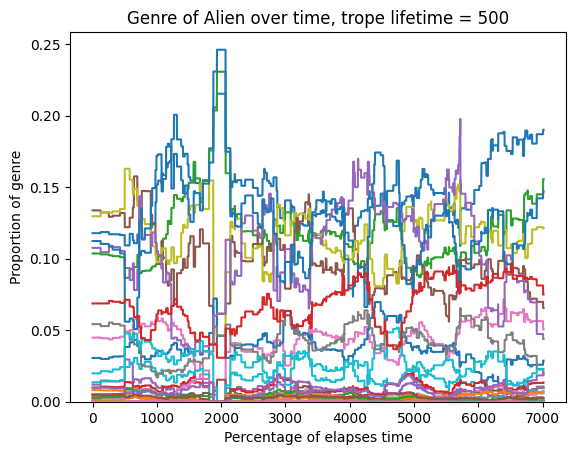

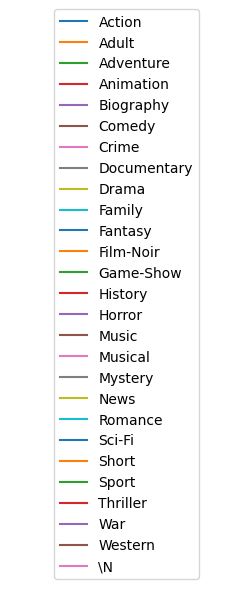

In [15]:
### All genres
fig = plt.figure()
ax = fig.add_subplot(111)
for genre in genres:
    ax.plot(df['second'], df[genre], label=genre)
plt.xlabel("Percentage of elapses time")
plt.ylabel("Proportion of genre")
plt.title("Genre of Alien over time, trope lifetime = " + str(tau))

# then create a new image
# adjust the figure size as necessary
figsize = (3, 3)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center')
ax.set_ylim(0,)
# hide the axes frame and the x/y labels
ax_leg.axis('off')


<Axes: ylabel='Horror'>

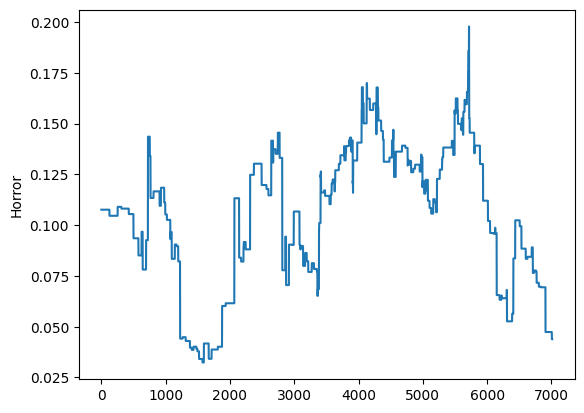

In [16]:
import seaborn as sns 
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_ylim(0, .5)
sns.lineplot(df['Horror'], ax=ax)


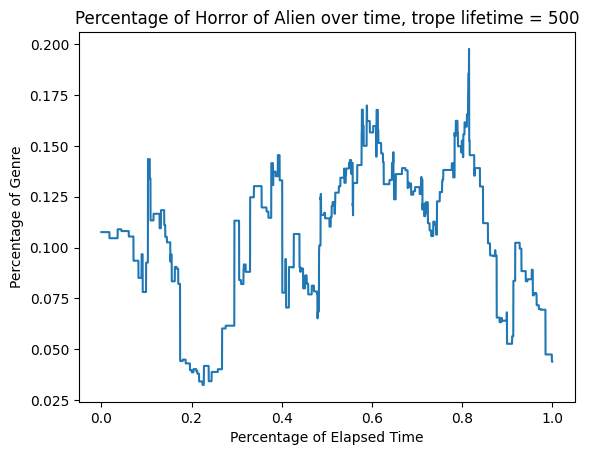

In [17]:
### Dealers Choice
genre = "Horror"  ### Input genre here

props = list(df[genre])
plt.plot(df['second']/7014, props)
plt.xlabel("Percentage of Elapsed Time")
plt.ylabel("Percentage of Genre")
plt.title("Percentage of " + genre + " of Alien over time, trope lifetime = " + str(tau))
plt.show()

In [18]:
### Get titles, times, and descriptions of tropes

labels = []
times = []
with open(f"{root}/Code/Alien Stuff/Alien Tropes - CodeTest.tsv", "r") as file:
    tsv_reader = csv.reader(file, delimiter='\t')
    next(tsv_reader)
    for line in tsv_reader:
        trope = line[0].replace(" ", "")
        inverted_or_defied = line[1]
        averted_or_subverted = line[2]
        descriptor = line[3]
        background = line[4]
        setup = line[5]
        start_time = float(line[6])
        end_time = float(line[7])
        if background == "Yes":
            continue
        elif inverted_or_defied == "Yes":
            label = "Inverted/Defied " + trope + ": " + descriptor
            labels.append(label)
            times.append(start_time)
        elif averted_or_subverted == "Yes":
            label = "Averted/Subverted " + trope + ": " + descriptor
            labels.append(label)
            times.append(start_time)
        elif setup == "Yes":
            label_one = "Setup - " + trope + ": " + descriptor
            label_two = "Conclusion - " + trope + ": " + descriptor
            labels.append(label_one)
            times.append(start_time)
            labels.append(label_two)
            times.append(end_time)
        else:
            label = trope + ": " + descriptor
            labels.append(label)
            times.append(start_time)


In [19]:
times = list(set(times))
labels = [""] * len(times) 
with open(f"{root}/Code/Alien Stuff/Alien Tropes - CodeTest.tsv", "r") as file:
    tsv_reader = csv.reader(file, delimiter='\t')
    next(tsv_reader)
    for line in tsv_reader:
        trope = line[0].replace(" ", "")
        inverted_or_defied = line[1]
        averted_or_subverted = line[2]
        descriptor = line[3]
        background = line[4]
        setup = line[5]
        start_time = float(line[6])
        end_time = float(line[7]) 
        if background == "Yes":
            continue
        elif inverted_or_defied == "Yes":
            label = "Inverted/Defied " + trope + ": " + descriptor
            index = times.index(start_time )
            labels[index] += label + "\n"
        elif averted_or_subverted == "Yes":
            label = "Averted/Subverted " + trope + ": " + descriptor
            index = times.index(start_time)
            labels[index] += label + "\n"
        elif setup == "Yes":
            label_one = "Setup - " + trope + ": " + descriptor
            label_two = "Conclusion - " + trope + ": " + descriptor
            index_one = times.index(start_time)
            labels[index_one] += label_one + "\n"
            index_two = times.index(end_time)
            labels[index_two] += label_two + "\n"
        else:
            label = trope + ": " + descriptor
            index = times.index(start_time)
            labels[index] += label + "\n"

In [20]:
print(labels)

['BookEnds: Beginning and ending are of a sleeper ship floating in space\n', "Cover'sAlwaysLie: Egg opens in a way that is not shown in promo poster\n", "ImpliedRape: Lambert's death\n", 'Setup - Foreshadowing: Ash looking at embryo on screen -> Ash reveal\n', "AIIsACrapshoot: Ripley discovers Ash's intentions\nEvilAllAlong: Ash revealed to be working for company\nEvilPlan: Ash revealed to be working for company\nConclusion - Foreshadowing: Ash looking at embryo on screen -> Ash reveal\nConclusion - Foreshadowing: Ash prevents parker from stabbing the facehugger -> Ash Reveal\n", 'Air-VentPassageway: Xenomorph on ship\n', 'DeadpanSnarker: Scene with Brett and Parker\nThoseTwoGuys: Scenes with Brett and Parker\n', "DeathByTransceiver: Lambert's death can be heard on radio by Ripley\nFinalGirl: Ripley is the last survivor\nGoryDiscretionShot: Kill not fully shown\nInTheEndYouAreonYourOwn: Parker and Lambert deaths leave Ripley the last alive\nInverted/Defied VasquezAlwaysDies: Lambert is

In [21]:
import plotly.graph_objects as go

In [22]:
# Assuming build_snapshots() returns a DataFrame with appropriate columns
df = build_snapshots(movie_tropes, genres=genres, tau=1)

# Create the plot
fig = go.Figure()

# Add genre line (e.g., 'Horror') to the plot
initial_genre = 'Horror'
fig.add_trace(go.Scatter(
    x=df['second'], ### plot every sefcond... maybe this should be just the times too...?
    y=df[initial_genre], 
    mode='lines',  
    name=initial_genre, 
    line=dict(width=2),  
))

# add tropes 
fig.add_trace(go.Scatter(
    x=times,  # x-axis is the times for the tropes
    y=[df.loc[df['second'] == time, initial_genre].values[0] for time in times],  # y-values to position the dots on the line
    mode='markers', 
    name='Tropes',  
    marker=dict(size=8, color='red', symbol='circle'),  
    hovertext=labels,  
    hovertemplate='%{hovertext}',  # Show the hovertext for the tropes
))

# Create dropdown buttons to select genres
dropdown_buttons = [
    {
        'args': [
            {'y': [df[genre]], 'name': genre},  # Update y and name (legend)
            {'title': f"Genre Makeup Over Time - {genre}"}
        ],
        'label': genre,
        'method': 'update'
    } for genre in genres
]

# Create slider steps for tau values
tau_values = [1, 60, 600, 1200]  
slider_steps = []
for tau in tau_values:
    # Update the DataFrame with the new tau value
    df_tau = build_snapshots(movie_tropes, genres=genres, tau=tau)

    # Add a slider step for each tau value
    slider_steps.append({
        'args': [
            {'y': [df_tau[initial_genre]]},
            {'title': f"Genre Makeup Over Time (Topre Decay = {tau})"}
        ],
        'label': str(tau),
        'method': 'update'
    })

# Add dropdown and slider to layout
fig.update_layout(
    title=f"Genre Makeup Over Time ($\\tau = {1}$)",  # Default tau value in title
    xaxis_title="Time (seconds)",
    yaxis_title="Percentage Makeup",
    template="plotly_white",  
    showlegend=True,  # Show the legend
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.1,
        'xanchor': 'left',
        'y': 1,  # Push the dropdown further down
        'yanchor': 'top'
    }],
    sliders=[{
        'currentvalue': {
            'prefix': 'Trope Decay = ',
            'visible': True,
            'xanchor': 'center',
            'font': {'size': 12}
        },
        'steps': slider_steps
    }],
    width=1000,  # Set the width of the figure
    height=800,  # Set the height of the figure
    margin=dict(t=50, b=300, l=50, r=50)  # Increase bottom margin to create more space
)

# Adjust the slider position and appearance
fig['layout']['sliders'][0]['pad'] = dict(r=10, t=150)

# Show the plot
fig.show()
